<a href="https://colab.research.google.com/github/JoNeedsSleep/ARENA/blob/main/playground.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Playground for small interpretability experiments

https://github.com/TransformerLensOrg/TransformerLens?tab=readme-ov-file


In [ ]:
!pip install transformer_lens

In [ ]:
import transformer_lens

# Load a model (eg GPT-2 Small)
gpt_2_small_model = transformer_lens.HookedTransformer.from_pretrained("gpt2-small",fold_ln=True)
sorted_vocab = sorted(list(gpt_2_small_model.tokenizer.vocab.items()), key=lambda n: n[1])


print(gpt_2_small_model.tokenizer.vocab.items())

# logits, activations = model.run_with_cache("SolidGoldMagiKarp")

In [14]:
gpt_2_small_model.tokenizer.vocab['Ġ!']

5145

In [31]:
cache

ActivationCache with keys ['hook_embed', 'hook_pos_embed', 'blocks.0.hook_resid_pre', 'blocks.0.ln1.hook_scale', 'blocks.0.ln1.hook_normalized', 'blocks.0.attn.hook_q', 'blocks.0.attn.hook_k', 'blocks.0.attn.hook_v', 'blocks.0.attn.hook_attn_scores', 'blocks.0.attn.hook_pattern', 'blocks.0.attn.hook_z', 'blocks.0.hook_attn_out', 'blocks.0.hook_resid_mid', 'blocks.0.ln2.hook_scale', 'blocks.0.ln2.hook_normalized', 'blocks.0.mlp.hook_pre', 'blocks.0.mlp.hook_post', 'blocks.0.hook_mlp_out', 'blocks.0.hook_resid_post', 'blocks.1.hook_resid_pre', 'blocks.1.ln1.hook_scale', 'blocks.1.ln1.hook_normalized', 'blocks.1.attn.hook_q', 'blocks.1.attn.hook_k', 'blocks.1.attn.hook_v', 'blocks.1.attn.hook_attn_scores', 'blocks.1.attn.hook_pattern', 'blocks.1.attn.hook_z', 'blocks.1.hook_attn_out', 'blocks.1.hook_resid_mid', 'blocks.1.ln2.hook_scale', 'blocks.1.ln2.hook_normalized', 'blocks.1.mlp.hook_pre', 'blocks.1.mlp.hook_post', 'blocks.1.hook_mlp_out', 'blocks.1.hook_resid_post', 'blocks.2.hook_re

In [27]:
logits,cache = gpt_2_small_model.run_with_cache(["SolidGoldMagiKarp"],remove_batch_dim=True)

In [44]:
gpt_2_small_model.embed.W_E.detach.numpy()

AttributeError: 'builtin_function_or_method' object has no attribute 'numpy'

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch

# Extract b_U from the model
b_U = gpt_2_small_model.unembed.b_U.detach().cpu().numpy()

token_embeddings = gpt_2_small_model.wte.weight.detach().cpu().numpy()
mean_embedding = np.mean(token_embeddings, axis=0)
embed_norms = np.linalg.norm(token_embeddings - mean_embedding, axis=1)

# Token IDs (assuming natural order)
token_ids = np.arange(len(b_U))  # Token index as a proxy for frequency rank
log_freqs = np.log(token_ids + 1)  # Avoid log(0) issue


AttributeError: 'HookedTransformer' object has no attribute 'wte'

In [58]:
embed = gpt_2_small_model.embed.W_E.detach().numpy()
mean_embed = embed.mean(0)
embed_norms = np.linalg.norm(embed - mean_embed, axis=1)

weight_bias = gpt_2_small_model.unembed.b_U.detach().numpy()

In [60]:
embed_norms.size

50257

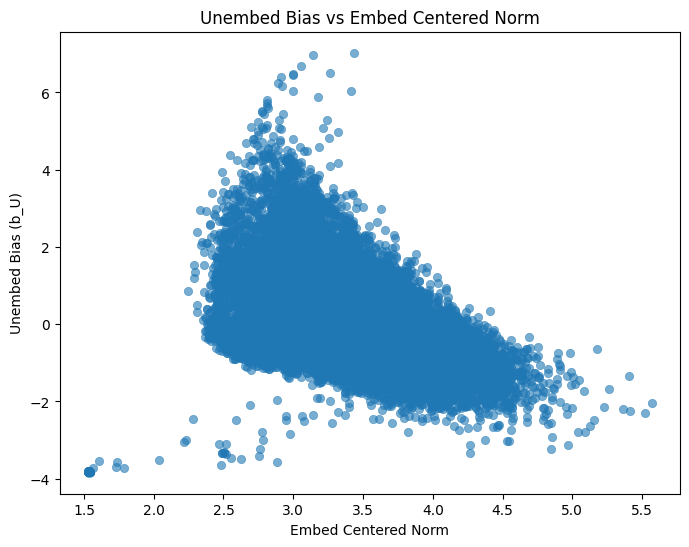

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Create scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=embed_norms, y=weight_bias, alpha=0.6, edgecolor=None)

# Labels and formatting
plt.xlabel("Embed Centered Norm")
plt.ylabel("Unembed Bias (b_U)")
plt.title("Unembed Bias vs Embed Centered Norm")

# Show plot
plt.show()


RuntimeError: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).

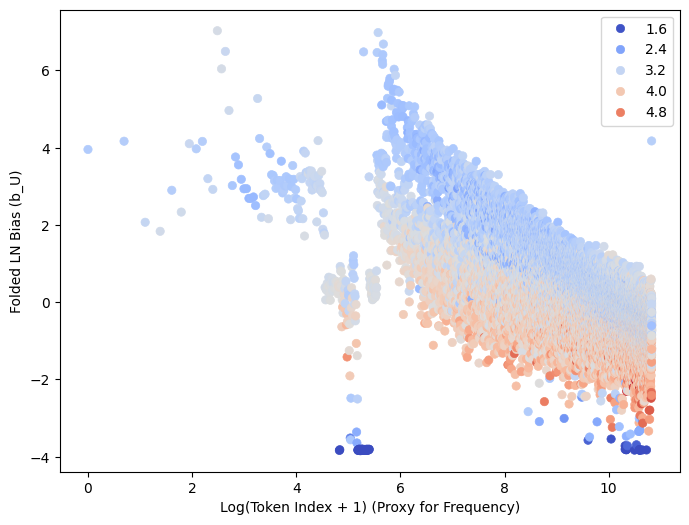

In [64]:
token_ids = np.arange(len(b_U))  # Token index as a proxy for frequency rank
log_freqs = np.log(token_ids + 1)  # Avoid log(0) issue
plt.figure(figsize=(8, 6))
sns.scatterplot(x=log_freqs, y=b_U, hue=embed_norms, palette="coolwarm", edgecolor=None)
plt.xlabel("Log(Token Index + 1) (Proxy for Frequency)")
plt.ylabel("Folded LN Bias (b_U)")
plt.colorbar(label="Embed centered norm")
plt.title("Unigram vs b_U (Token Index as Frequency Proxy)")
plt.xscale("log")  # Log scale to match visualization
plt.show()

ValueError: Unable to determine Axes to steal space for Colorbar. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.

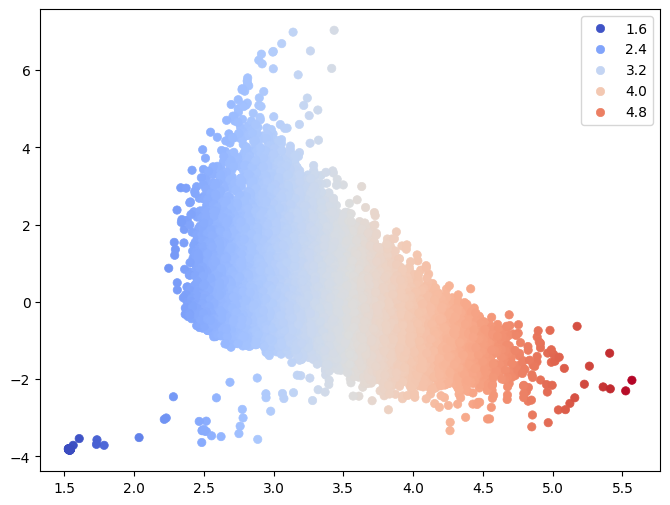

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create scatter plot with color mapping
plt.figure(figsize=(8, 6))
scatter = sns.scatterplot(x=embed_norms, y=weight_bias, hue=embed_norms, palette="coolwarm", edgecolor=None)

# Add colorbar
norm = plt.Normalize(embed_norms.min(), embed_norms.max())  # Normalize color scale
sm = plt.cm.ScalarMappable(cmap="coolwarm", norm=norm)  # Create color mapping
sm.set_array([])  # Dummy array for colorbar
plt.colorbar(sm, label="Embed Centered Norm")  # Add colorbar

# Labels and formatting
plt.xlabel("Embed Centered Norm")
plt.ylabel("Unembed Bias (b_U)")
plt.title("Unembed Bias vs Embed Centered Norm")

# Show plot
plt.show()
